# Custom Classification Network

In [80]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [81]:
# Load Data set
data = pd.read_csv('datasets/admission_predict.csv')  
data.head()
#print(data.shape)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [82]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [83]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})

data = data[['GRE Score', 'TOEFL Score', 
             'University Rating', 'SOP', 
             'LOR ', 'CGPA', 'Research', 
             'Admit_Probability']]

In [84]:
data.head()
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0, 0.5, 'CGPA')

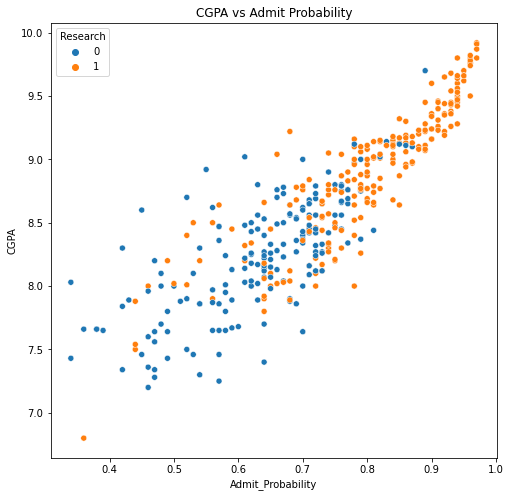

In [85]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'Admit_Probability', y = 'CGPA', data = data, hue = 'Research')

plt.title("CGPA vs Admit Probability")

plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')

Text(0, 0.5, 'CGPA')

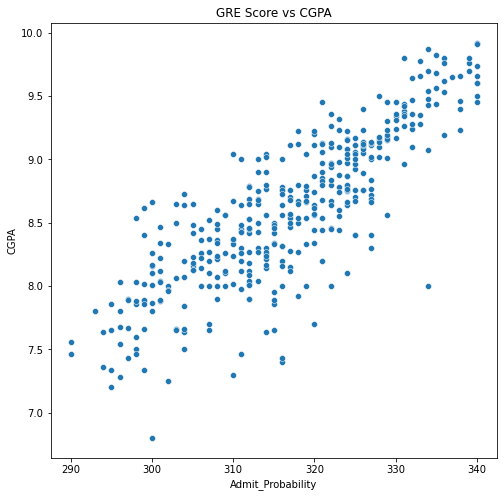

In [86]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'GRE Score', y = 'CGPA', data = data)
plt.title("GRE Score vs CGPA")

plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')

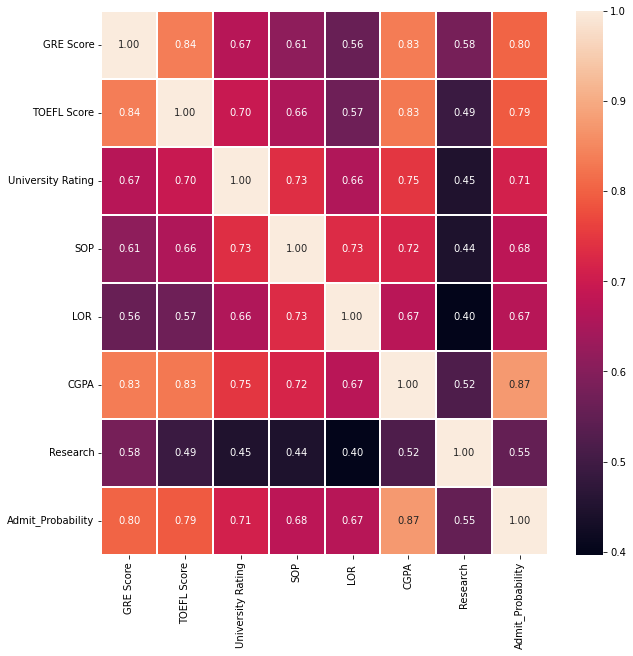

In [87]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')

plt.show()

In [88]:
from sklearn import preprocessing

In [89]:
#Standarizing features
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA' ]] = \
                preprocessing.scale(data[['GRE Score', 'TOEFL Score','SOP', 'LOR ', 'CGPA']])

In [90]:
data.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
187,1.587576,1.746971,5,1.093864,0.052933,1.412216,1,0.93
48,0.365860,0.427257,3,0.099442,1.724515,0.421570,1,0.82
149,-0.506794,-0.232599,2,0.099442,-0.504260,-0.569076,1,0.79
385,1.587576,1.582006,5,1.591075,1.724515,2.050259,1,0.96
367,-0.506794,-1.552313,1,-2.386613,-1.061454,-1.912324,0,0.57
22,0.976718,1.417042,5,1.591075,1.724515,1.512959,1,0.94
154,0.802187,0.097329,3,-0.397769,0.052933,0.488732,0,0.80
258,0.802187,-0.892456,4,1.591075,1.724515,0.270455,1,0.77
74,-0.244998,-0.232599,3,-0.397769,1.724515,0.505523,0,0.74
47,1.936637,1.911935,5,1.093864,0.610127,1.848771,0,0.89


In [91]:
col = ['GRE Score','TOEFL Score', 'SOP', 'LOR ', 'CGPA']

features = data[col]
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [92]:
target = data[['Admit_Probability']]
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [93]:
# Create new Output y of 3 classes
y = target.copy()


y['Admit_Probability'] = y['Admit_Probability']*100

y['Admit_Probability'][target['Admit_Probability']< 0.60] = int(0)
y['Admit_Probability'][target['Admit_Probability']>= 0.60] = int(1)
y['Admit_Probability'][target['Admit_Probability']>= 0.80] = int(2)
y.head()

,Admit_Probability
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0


In [94]:
target = y
target['Admit_Probability'].unique() # Check that the replacement was ok

array([2., 1., 0.])

In [95]:
target.head()

,Admit_Probability
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# split data
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)
# Turn it to tensor
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(x_test.values).float()
Ytrain = torch.from_numpy(Y_train.values).view(1, -1)[0].long()
Ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()

print(Xtrain.shape, Ytrain.shape, Ytest.shape)

torch.Size([320, 5]) torch.Size([320]) torch.Size([80])


In [98]:
import torch.nn as nn
import torch.nn.functional as F

In [99]:
input_size = Xtrain.shape[1]

output_size = len(target['Admit_Probability'].unique()) # no. of classes output size


In [100]:
class Net(nn.Module): #Inheritance
    
    def __init__(self,hidden_size, activation_fn = 'relu', apply_dropout=False): 
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        ''' When creating customs the forward must be specified.
        Here you state what how the input is transformed to the output. 
        The tensor classes takes care of the backward passes and calculation
        '''
        activation_fn = None
        if  self.activation_fn == 'sigmoid':
                activation_fn = F.torch.sigmoid

        elif self.activation_fn == 'tanh':
                activation_fn = F.torch.tanh

        elif self.activation_fn == 'relu':
                 activation_fn = F.relu

        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))

        if self.dropout != None:
            x = self.dropout(x)

        x = self.fc3(x) 
        return F.log_softmax(x, dim = -1) # Faster way of softmax with less numeric bugs

In [101]:
import torch.optim as optim

In [103]:
def train_and_evaluate_model(model, learn_rate=0.001):
    ''' Training function
    Args:
    model: pytorch model class
    '''
    epoch_data = []
    epochs = 1001
    
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    
    loss_fn = nn.NLLLoss()
    
    test_accuracy = 0.0
    for epoch in range(1, epochs):

        optimizer.zero_grad()

        Ypred = model(Xtrain)

        loss = loss_fn(Ypred , Ytrain)
        loss.backward()

        optimizer.step()

        Ypred_test = model(Xtest)
        loss_test = loss_fn(Ypred_test, Ytest)

        _, pred = Ypred_test.data.max(1)

        test_accuracy = pred.eq(Ytest.data).sum().item() / y_test.values.size
        
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])

        if epoch % 100 == 0:
            print ('epoch - %d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
                   % (epoch, epoch/150 * 10 , loss.data.item(), loss_test.data.item(), test_accuracy))
            

    return {'model' : model,
            'epoch_data' : epoch_data, 
            'num_epochs' : epochs, 
            'optimizer' : optimizer, 
            'loss_fn' : loss_fn,
            'test_accuracy' : test_accuracy,
            '_, pred' : Ypred_test.data.max(1),
            'actual_test_label' : Ytest,
            }

In [104]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [105]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.14 test loss - 1.14 Test accuracy - 0.1750
epoch - 200 (13%) train loss - 1.06 test loss - 1.06 Test accuracy - 0.4750
epoch - 300 (20%) train loss - 1.01 test loss - 1.02 Test accuracy - 0.4750
epoch - 400 (26%) train loss - 0.98 test loss - 0.99 Test accuracy - 0.4750
epoch - 500 (33%) train loss - 0.95 test loss - 0.95 Test accuracy - 0.4750
epoch - 600 (40%) train loss - 0.90 test loss - 0.91 Test accuracy - 0.4750
epoch - 700 (46%) train loss - 0.85 test loss - 0.86 Test accuracy - 0.7125
epoch - 800 (53%) train loss - 0.80 test loss - 0.81 Test accuracy - 0.7625
epoch - 900 (60%) train loss - 0.75 test loss - 0.76 Test accuracy - 0.7375
epoch - 1000 (66%) train loss - 0.71 test loss - 0.72 Test accuracy - 0.7375


In [106]:
net = Net(hidden_size=50, activation_fn='tanh')

result_50_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.44 test loss - 0.47 Test accuracy - 0.8125
epoch - 200 (13%) train loss - 0.41 test loss - 0.49 Test accuracy - 0.8250
epoch - 300 (20%) train loss - 0.39 test loss - 0.50 Test accuracy - 0.8250
epoch - 400 (26%) train loss - 0.37 test loss - 0.53 Test accuracy - 0.8125
epoch - 500 (33%) train loss - 0.34 test loss - 0.56 Test accuracy - 0.7750
epoch - 600 (40%) train loss - 0.31 test loss - 0.60 Test accuracy - 0.7750
epoch - 700 (46%) train loss - 0.27 test loss - 0.63 Test accuracy - 0.7875
epoch - 800 (53%) train loss - 0.24 test loss - 0.67 Test accuracy - 0.7875
epoch - 900 (60%) train loss - 0.21 test loss - 0.73 Test accuracy - 0.7750
epoch - 1000 (66%) train loss - 0.17 test loss - 0.79 Test accuracy - 0.7250


In [107]:
net = Net(hidden_size=1000, activation_fn='tanh', apply_dropout=True)

result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.32 test loss - 0.56 Test accuracy - 0.7875
epoch - 200 (13%) train loss - 0.17 test loss - 0.71 Test accuracy - 0.7625
epoch - 300 (20%) train loss - 0.07 test loss - 0.88 Test accuracy - 0.7625
epoch - 400 (26%) train loss - 0.04 test loss - 1.19 Test accuracy - 0.7250
epoch - 500 (33%) train loss - 0.02 test loss - 1.19 Test accuracy - 0.7125
epoch - 600 (40%) train loss - 0.02 test loss - 1.11 Test accuracy - 0.7875
epoch - 700 (46%) train loss - 0.01 test loss - 1.34 Test accuracy - 0.7250
epoch - 800 (53%) train loss - 0.01 test loss - 1.28 Test accuracy - 0.7625
epoch - 900 (60%) train loss - 0.00 test loss - 1.41 Test accuracy - 0.7375
epoch - 1000 (66%) train loss - 0.01 test loss - 1.54 Test accuracy - 0.7250


In [108]:
net = Net(hidden_size=100, activation_fn='sigmoid')

result_100_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.53 test loss - 0.53 Test accuracy - 0.8250
epoch - 200 (13%) train loss - 0.45 test loss - 0.48 Test accuracy - 0.8000
epoch - 300 (20%) train loss - 0.43 test loss - 0.48 Test accuracy - 0.8250
epoch - 400 (26%) train loss - 0.41 test loss - 0.48 Test accuracy - 0.8000
epoch - 500 (33%) train loss - 0.41 test loss - 0.49 Test accuracy - 0.8125
epoch - 600 (40%) train loss - 0.40 test loss - 0.49 Test accuracy - 0.8250
epoch - 700 (46%) train loss - 0.40 test loss - 0.50 Test accuracy - 0.8250
epoch - 800 (53%) train loss - 0.39 test loss - 0.51 Test accuracy - 0.8125
epoch - 900 (60%) train loss - 0.39 test loss - 0.51 Test accuracy - 0.8125
epoch - 1000 (66%) train loss - 0.38 test loss - 0.52 Test accuracy - 0.8250


In [109]:
# Best Model
result_model = result_100_sigmoid
df_epochs_data = pd.DataFrame(result_model['epoch_data'], 
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

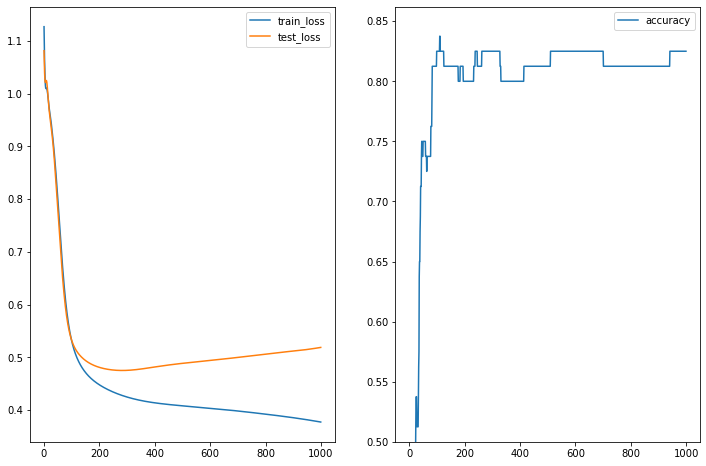

In [110]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()

In [111]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [112]:
_, pred = result_model['_, pred'] 

In [113]:
y_pred = pred.detach().numpy()

In [114]:
Ytest = result_model['actual_test_label'].detach().numpy()

In [115]:
results = confusion_matrix(Ytest, y_pred)

In [116]:
results

array([[ 8,  5,  1],
       [ 1, 33,  4],
       [ 0,  3, 25]], dtype=int64)

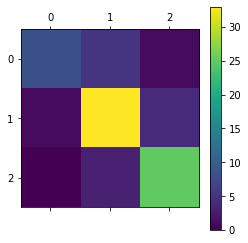

In [117]:
plt.matshow(results)

plt.colorbar()
plt.show()

In [118]:
recall_score(Ytest, y_pred,average = 'weighted')

0.825

In [119]:
precision_score(Ytest, y_pred,average = 'weighted')

0.8295392953929539